# **Tabular Playground Series - Sep 2022**
### Predicting a full year worth of sales

<img width="300" src="https://historia.nationalgeographic.com.es/medio/2017/06/26/nostradamus_1439x2000_11877630.JPG">

Here we go...

In [1]:
import pandas as pd

train_dataset = pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv')
# Hands on time stamps:
train_dataset['date'] = pd.to_datetime(train_dataset['date'])
train_dataset

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


## Sales by product:

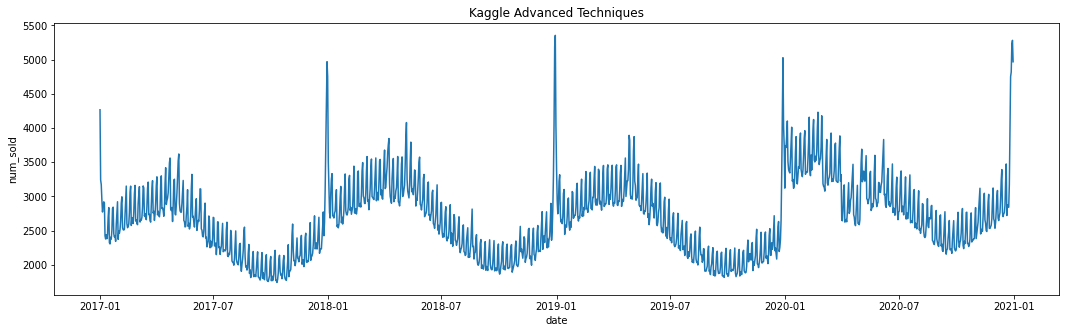

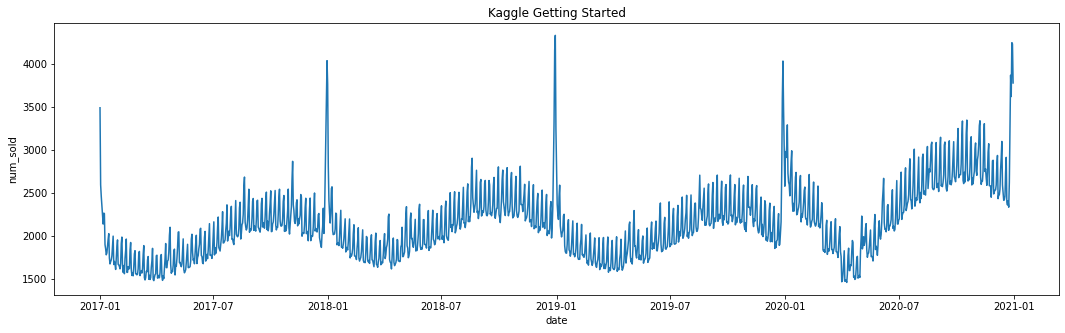

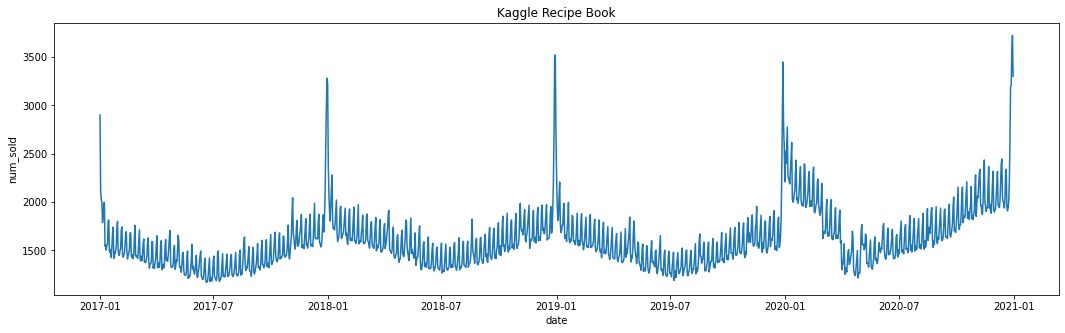

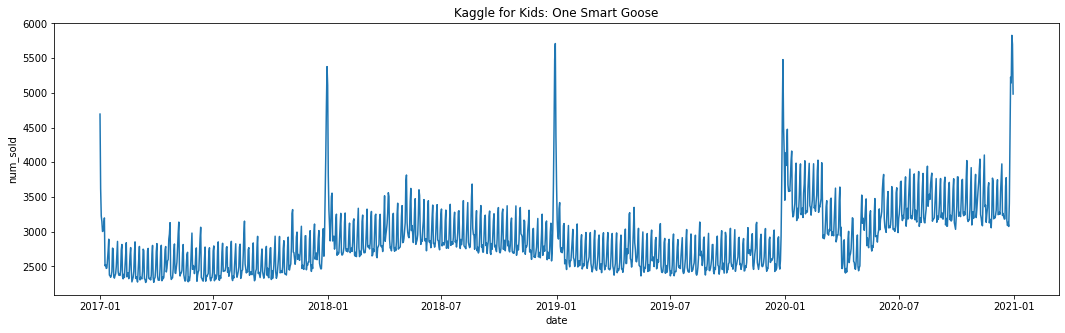

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

for product in train_dataset['product'].unique():
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=train_dataset[train_dataset['product'] == product].groupby('date').sum()[['num_sold']].reset_index(), x = 'date', y = 'num_sold').set_title(product)
    plt.show()

In [3]:
# grouped time series by book:
kat = train_dataset[train_dataset['product'] == 'Kaggle Advanced Techniques'].groupby('date').sum()[['num_sold']].reset_index()
kgs = train_dataset[train_dataset['product'] == 'Kaggle Getting Started'].groupby('date').sum()[['num_sold']].reset_index()
krb = train_dataset[train_dataset['product'] == 'Kaggle Recipe Book'].groupby('date').sum()[['num_sold']].reset_index()
kfk = train_dataset[train_dataset['product'] == 'Kaggle for Kids: One Smart Goose'].groupby('date').sum()[['num_sold']].reset_index()

In [4]:
# removing 2020:
kat = kat[kat['date'].dt.year < 2020]
kgs = kgs[kgs['date'].dt.year < 2020]
krb = krb[krb['date'].dt.year < 2020]
kfk = kfk[kfk['date'].dt.year < 2020]

In [5]:
import numpy as np

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
X, y = split_sequence(kat['num_sold'], 365)
X = X.reshape((X.shape[0], X.shape[1], 1))
X = X / kat['num_sold'].max()
y = y / kat['num_sold'].max()

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(LSTM(15, activation='relu', input_shape=(365, 1)))
model.add(Dense(1))
model.compile(optimizer='adam',metrics=['mape'],loss='mse')
model.summary()

2022-09-15 04:12:02.401716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 04:12:02.551279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 04:12:02.552173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 04:12:02.553488: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15)                1020      
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X, y, epochs=50)

Epoch 1/50


2022-09-15 04:12:05.927590: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


23/23 [==============================] - 15s 553ms/step - loss: 0.1771 - mape: 83.4599
Epoch 2/50
23/23 [==============================] - 14s 599ms/step - loss: 0.0974 - mape: 60.3308
Epoch 3/50
23/23 [==============================] - 13s 556ms/step - loss: 0.0219 - mape: 23.9074
Epoch 4/50
23/23 [==============================] - 13s 583ms/step - loss: 0.0044 - mape: 9.4754
Epoch 5/50
23/23 [==============================] - 13s 552ms/step - loss: 0.0035 - mape: 8.4632
Epoch 6/50
23/23 [==============================] - 13s 557ms/step - loss: 0.0034 - mape: 7.9056
Epoch 7/50
23/23 [==============================] - 14s 618ms/step - loss: 0.0034 - mape: 8.2482
Epoch 8/50
23/23 [==============================] - 13s 570ms/step - loss: 0.0034 - mape: 8.1079
Epoch 9/50
23/23 [==============================] - 14s 614ms/step - loss: 0.0034 - mape: 7.8698
Epoch 10/50
23/23 [==============================] - 13s 553ms/step - loss: 0.0034 - mape: 8.2687
Epoch 11/50
23/23 [==================

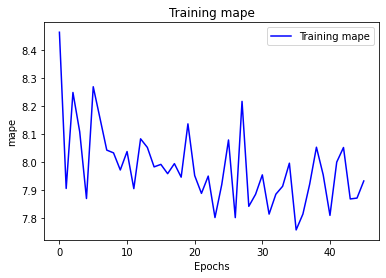

In [10]:
def visualize_mape(history, title):
    mape = history.history["mape"][4:]
    #val_loss = history.history["val_loss"]
    epochs = range(len(mape))
    plt.figure()
    plt.plot(epochs, mape, "b", label="Training mape")
    #plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("mape")
    plt.legend()
    plt.show()


visualize_mape(history, "Training mape")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:title={'center':'Forecast'}, xlabel='date'>

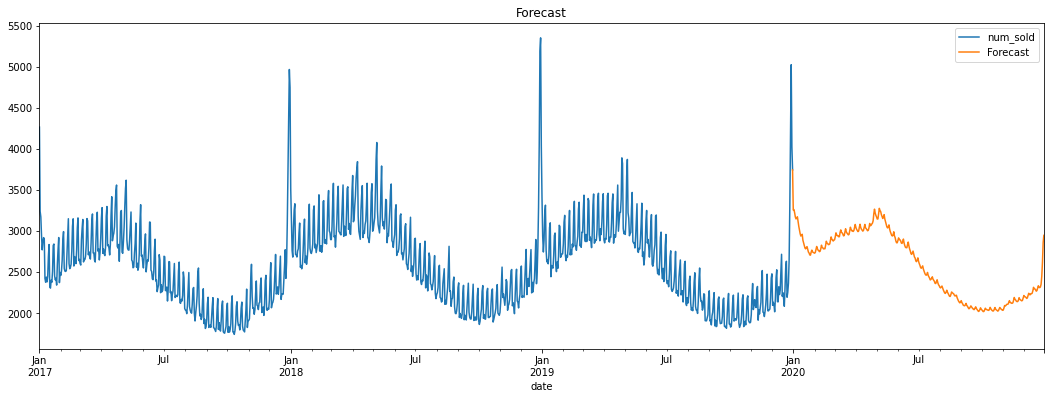

In [11]:
# generate the input and output sequences
n_lookback = 365  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)*kat['num_sold'].max()
#Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = kat
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['num_sold'].iloc[-1]

df_future = pd.DataFrame(columns=['date', 'num_sold', 'Forecast'])
df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['num_sold'] = np.nan

results = df_past.append(df_future).set_index('date')

# plot the results
results.plot(title='Forecast', figsize=(18, 6))

In [12]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(365, 1)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',metrics=['mape'],loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X, y, epochs=25)

Epoch 1/25
23/23 [==============================] - 15s 585ms/step - loss: 0.1709 - mape: 79.6494
Epoch 2/25
23/23 [==============================] - 12s 543ms/step - loss: 0.0152 - mape: 19.6644
Epoch 3/25
23/23 [==============================] - 13s 584ms/step - loss: 0.0042 - mape: 8.9078
Epoch 4/25
23/23 [==============================] - 13s 545ms/step - loss: 0.0036 - mape: 9.2085
Epoch 5/25
23/23 [==============================] - 12s 543ms/step - loss: 0.0034 - mape: 8.7428
Epoch 6/25
23/23 [==============================] - 13s 576ms/step - loss: 0.0034 - mape: 8.4924
Epoch 7/25
23/23 [==============================] - 13s 545ms/step - loss: 0.0033 - mape: 8.4202
Epoch 8/25
23/23 [==============================] - 14s 589ms/step - loss: 0.0033 - mape: 8.5707
Epoch 9/25
23/23 [==============================] - 12s 540ms/step - loss: 0.0033 - mape: 8.4380
Epoch 10/25
23/23 [==============================] - 13s 547ms/step - loss: 0.0033 - mape: 8.1197
Epoch 11/25
23/23 [========

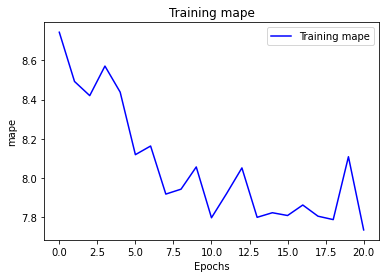

In [14]:
visualize_mape(history, "Training mape")

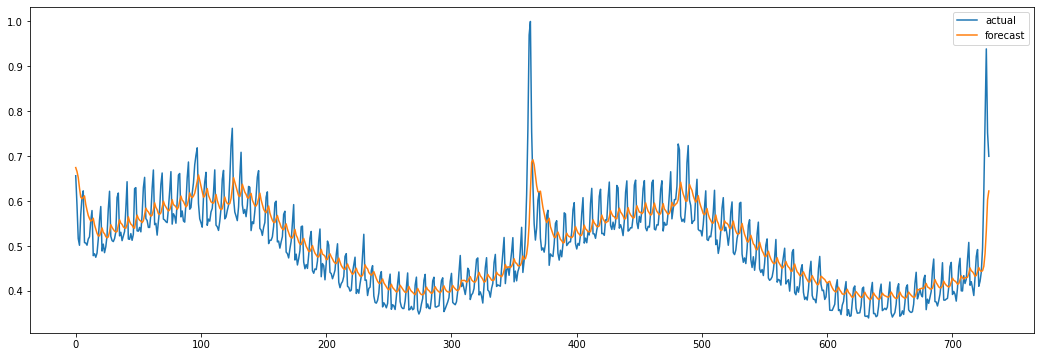

In [15]:
y_pred = model.predict(X)
plt.figure(figsize=(18, 6))
plt.plot(y)
plt.plot(y_pred)
plt.legend(["actual", "forecast"])
plt.show()

<AxesSubplot:title={'center':'Forecast'}, xlabel='date'>

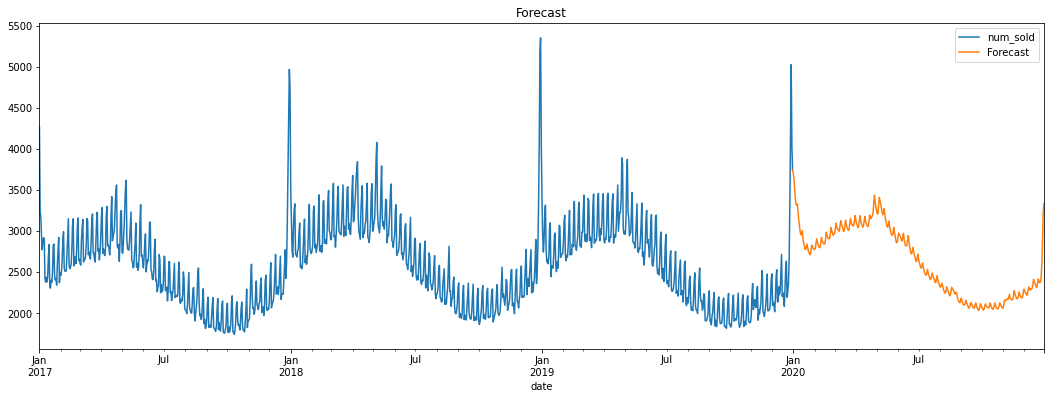

In [16]:
# generate the input and output sequences
n_lookback = 365  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)*kat['num_sold'].max()
#Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = kat
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['num_sold'].iloc[-1]

df_future = pd.DataFrame(columns=['date', 'num_sold', 'Forecast'])
df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['num_sold'] = np.nan

results = df_past.append(df_future).set_index('date')

# plot the results
results.plot(title='Forecast', figsize=(18, 6))

In [17]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(365, 1)))
model.add(Dense(1))
model.compile(optimizer='adam',metrics=['mape'],loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X, y, epochs=25)

Epoch 1/25
23/23 [==============================] - 13s 543ms/step - loss: 0.1264 - mape: 65.7320
Epoch 2/25
23/23 [==============================] - 13s 559ms/step - loss: 0.0066 - mape: 12.1216
Epoch 3/25
23/23 [==============================] - 14s 612ms/step - loss: 0.0038 - mape: 8.9515
Epoch 4/25
23/23 [==============================] - 13s 555ms/step - loss: 0.0036 - mape: 8.5912
Epoch 5/25
23/23 [==============================] - 14s 595ms/step - loss: 0.0035 - mape: 8.3975
Epoch 6/25
23/23 [==============================] - 12s 544ms/step - loss: 0.0035 - mape: 8.4324
Epoch 7/25
23/23 [==============================] - 13s 551ms/step - loss: 0.0034 - mape: 8.4282
Epoch 8/25
23/23 [==============================] - 14s 615ms/step - loss: 0.0034 - mape: 8.3087
Epoch 9/25
23/23 [==============================] - 12s 540ms/step - loss: 0.0034 - mape: 8.2261
Epoch 10/25
23/23 [==============================] - 14s 591ms/step - loss: 0.0034 - mape: 8.0894
Epoch 11/25
23/23 [========

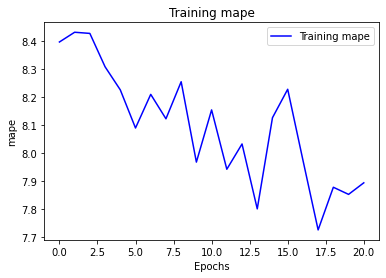

In [19]:
visualize_mape(history, "Training mape")

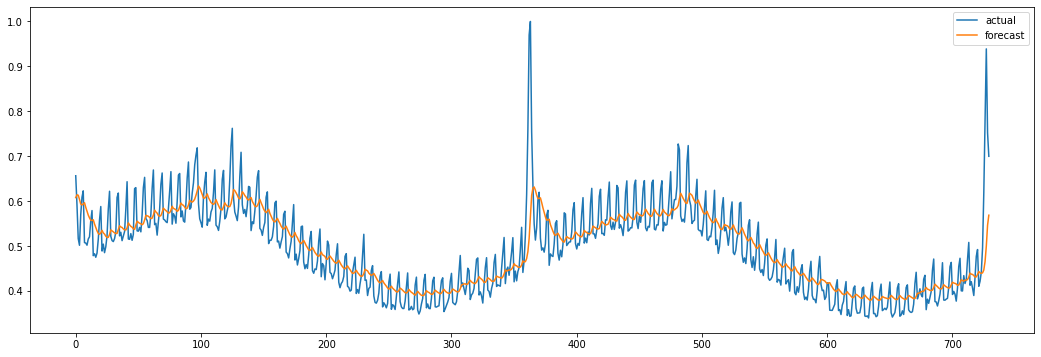

In [20]:
y_pred = model.predict(X)
plt.figure(figsize=(18, 6))
plt.plot(y)
plt.plot(y_pred)
plt.legend(["actual", "forecast"])
plt.show()

<AxesSubplot:title={'center':'Forecast'}, xlabel='date'>

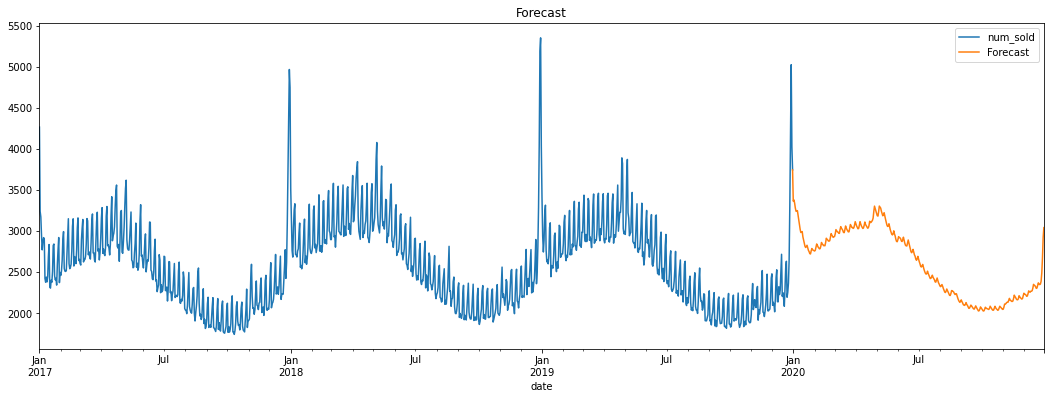

In [21]:
# generate the input and output sequences
n_lookback = 365  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)*kat['num_sold'].max()
#Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = kat
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['num_sold'].iloc[-1]

df_future = pd.DataFrame(columns=['date', 'num_sold', 'Forecast'])
df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['num_sold'] = np.nan

results = df_past.append(df_future).set_index('date')

# plot the results
results.plot(title='Forecast', figsize=(18, 6))